
 data scaling, 
 n-gram analysis
feature reduction using diffusion maps
k-means clustering + knn 


# Data Preparation

### Everything W/O Meta Data

In [5]:
#all necessary ones w/o meta data
df1=df[['starttime','ecgi','min5_average_pdcp_sdu_delay_dl', 'min5_average_pdcp_sdu_drop_rate_dl', 'min5_pdcp_packets_lost_rate_dl', 'min5_pdcp_packets_lost_rate_ul', 'min5_volte_downlink_packet_loss_rate', 'min5_volte_uplink_packet_loss_rate']]

In [6]:
df1.head()

,starttime,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
0,2021-11-01 01:10:00,2708756710728705,0.0,0.0,0.0,0.0,0,0
1,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
2,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
3,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0
4,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0


In [7]:
df2=df1.copy(deep=True)

In [8]:
df2.head()

,starttime,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
0,2021-11-01 01:10:00,2708756710728705,0.0,0.0,0.0,0.0,0,0
1,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
2,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
3,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0
4,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0


In [9]:
df2.sort_values(by='starttime', ascending=True)

,starttime,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
66773,2021-10-18 00:05:00,2708756710728706,0.000000,0.0,0.000000,0.0,0,0
26352,2021-10-18 00:05:00,2708756710728195,20.030464,0.0,0.013185,0.0,0,0
66770,2021-10-18 00:05:00,2708756710728706,0.000000,0.0,0.000540,0.0,0,0
16867,2021-10-18 00:05:00,2708756710728194,0.000000,0.0,0.000000,0.0,0,0
26463,2021-10-18 00:05:00,2708756710728449,0.000000,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...
913,2021-11-01 09:10:00,2708756710728451,15.689971,0.0,0.000435,0.0,0,0
987,2021-11-01 09:10:00,2708756710728706,0.000000,0.0,0.000000,0.0,0,0
912,2021-11-01 09:10:00,2708756710728450,26.132322,0.0,0.002929,0.0,0,0
1013,2021-11-01 09:10:00,2708756710728707,52.454712,0.0,0.001409,0.0,0,0


In [10]:
df1['starttime'].value_counts()

2021-10-19 06:30:00    36
2021-10-25 14:10:00    36
2021-10-18 12:35:00    36
2021-10-20 08:20:00    36
2021-10-25 14:35:00    36
                       ..
2021-10-27 07:05:00     6
2021-10-27 08:00:00     6
2021-10-27 19:15:00     6
2021-10-27 10:50:00     6
2021-11-01 09:10:00     5
Name: starttime, Length: 4142, dtype: int64

In [ ]:
print(df1.head())

             starttime              ecgi  min5_average_pdcp_sdu_delay_dl  \
0  2021-11-01 01:10:00  2708756710728705                             0.0   
1  2021-11-01 01:10:00  2708756710728450                             0.0   
2  2021-11-01 01:10:00  2708756710728450                             0.0   
3  2021-10-28 07:20:00  2708756710728193                             0.0   
4  2021-10-28 07:20:00  2708756710728193                             0.0   

   min5_average_pdcp_sdu_drop_rate_dl  min5_pdcp_packets_lost_rate_dl  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   

   min5_pdcp_packets_lost_rate_ul  min5_volte_downlink_packet_loss_rate  \
0                            

In [ ]:
df1

,starttime,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
0,2021-11-01 01:10:00,2708756710728705,0.000000,0.0,0.000000,0.0,0,0
1,2021-11-01 01:10:00,2708756710728450,0.000000,0.0,0.000000,0.0,0,0
2,2021-11-01 01:10:00,2708756710728450,0.000000,0.0,0.000000,0.0,0,0
3,2021-10-28 07:20:00,2708756710728193,0.000000,0.0,0.000000,0.0,0,0
4,2021-10-28 07:20:00,2708756710728193,0.000000,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...
90931,2021-10-18 00:55:00,2708756710728707,0.000000,0.0,0.000000,0.0,0,0
90932,2021-10-18 01:05:00,2708756710728707,0.000000,0.0,0.107359,0.0,0,0
90933,2021-10-18 01:05:00,2708756710728707,32.834236,0.0,0.107359,0.0,0,0
90934,2021-10-18 01:00:00,2708756710728707,0.000000,0.0,0.000000,0.0,0,0


In [ ]:
df1.isnull().sum()

starttime                               0
ecgi                                    0
min5_average_pdcp_sdu_delay_dl          0
min5_average_pdcp_sdu_drop_rate_dl      0
min5_pdcp_packets_lost_rate_dl          0
min5_pdcp_packets_lost_rate_ul          0
min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
dtype: int64

In [ ]:
df1.value_counts()

starttime            ecgi              min5_average_pdcp_sdu_delay_dl  min5_average_pdcp_sdu_drop_rate_dl  min5_pdcp_packets_lost_rate_dl  min5_pdcp_packets_lost_rate_ul  min5_volte_downlink_packet_loss_rate  min5_volte_uplink_packet_loss_rate
2021-10-18 00:05:00  2708756710728194  0.000000                        0.0                                 0.000000                        0.000000                        0                                     0                                     4
2021-10-22 04:30:00  2708756710728195  0.000000                        0.0                                 0.000000                        0.000000                        0                                     0                                     4
                     2708756710728451  0.000000                        0.0                                 0.000000                        0.000000                        0                                     0                                     4
         

In [ ]:
df1['ecgi'].value_counts()

2708756710728707    14839
2708756710728705    13009
2708756710728450    10266
2708756710728706    10243
2708756710728449     9554
2708756710728451     9060
2708756710728194     8958
2708756710728193     7555
2708756710728195     7452
Name: ecgi, dtype: int64

### Everything W/O Meta Data and W/O ECGI or Time




In [ ]:
# everything without ecgi or time
df2=df[['min5_average_pdcp_sdu_delay_dl', 'min5_average_pdcp_sdu_drop_rate_dl', 'min5_pdcp_packets_lost_rate_dl', 'min5_pdcp_packets_lost_rate_ul', 'min5_volte_downlink_packet_loss_rate', 'min5_volte_uplink_packet_loss_rate']]

In [ ]:
df2.isnull().sum()

min5_average_pdcp_sdu_delay_dl          0
min5_average_pdcp_sdu_drop_rate_dl      0
min5_pdcp_packets_lost_rate_dl          0
min5_pdcp_packets_lost_rate_ul          0
min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
dtype: int64

In [ ]:
df2.value_counts()

min5_average_pdcp_sdu_delay_dl  min5_average_pdcp_sdu_drop_rate_dl  min5_pdcp_packets_lost_rate_dl  min5_pdcp_packets_lost_rate_ul  min5_volte_downlink_packet_loss_rate  min5_volte_uplink_packet_loss_rate
0.0000                          0.0                                 0.000000                        0.0                             0                                     0                                     54833
12.0000                         0.0                                 0.000000                        0.0                             0                                     0                                       140
29.5000                         0.0                                 0.000000                        0.0                             0                                     0                                        28
11.0000                         0.0                                 0.000000                        0.0                             0                    

### PDCP Packets Lost DL and UL

In [ ]:
#PDCP Packets Lost DL and UL

df3=df[['min5_pdcp_packets_lost_rate_dl', 'min5_pdcp_packets_lost_rate_ul']]

In [ ]:
df3.isnull().sum()

min5_pdcp_packets_lost_rate_dl    0
min5_pdcp_packets_lost_rate_ul    0
dtype: int64

In [ ]:
df3.value_counts()

min5_pdcp_packets_lost_rate_dl  min5_pdcp_packets_lost_rate_ul
0.000000                        0.000000                          59856
0.333333                        0.000000                             13
0.142857                        0.000000                             12
0.062500                        0.000000                             10
0.500000                        0.000000                              8
                                                                  ...  
0.007516                        0.781485                              1
0.000000                        0.958660                              1
0.007509                        0.000000                              1
0.007506                        0.000396                              1
0.925234                        0.000299                              1
Length: 17317, dtype: int64

### Min5 (Every 5mins) VoLTE DL/UL Packet Loss Rate


In [ ]:
# Min5 (Every 5mins) VoLTE DL/UL Packet Loss Rate

df4=df[['min5_volte_downlink_packet_loss_rate', 'min5_volte_uplink_packet_loss_rate']]

In [ ]:
df4.isnull().sum()

min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
dtype: int64

In [ ]:
df4.value_counts()

min5_volte_downlink_packet_loss_rate  min5_volte_uplink_packet_loss_rate
0                                     0                                     90936
dtype: int64

### Average Min5 (Every 5mins) PDCP DL SDU Drop Rate 

In [ ]:
# Average Min5 (Every 5mins) PDCP DL SDU Drop Rate 

df5=df[['min5_average_pdcp_sdu_drop_rate_dl']]

In [ ]:
df5.isnull().sum()

min5_average_pdcp_sdu_drop_rate_dl    0
dtype: int64

In [ ]:
df5.value_counts()

min5_average_pdcp_sdu_drop_rate_dl
0.000000                              90069
0.001790                                  2
0.001719                                  2
0.001692                                  2
0.001685                                  2
                                      ...  
0.003178                                  1
0.003179                                  1
0.003284                                  1
0.000151                                  1
0.000642                                  1
Length: 492, dtype: int64

### Average Min5 (Every 5mins) PDCP DL SDU Delay

In [ ]:
# Average Min5 (Every 5mins) PDCP DL SDU Delay

df6=df[['min5_average_pdcp_sdu_delay_dl']]

In [ ]:
df6.isnull().sum()

min5_average_pdcp_sdu_delay_dl    0
dtype: int64

In [ ]:
df6.value_counts()

min5_average_pdcp_sdu_delay_dl
0.000000                          69224
12.000000                           164
29.500000                            34
11.000000                            29
19.000000                            20
                                  ...  
31.921316                             1
31.932774                             1
31.932900                             1
31.968960                             1
3019.965600                           1
Length: 12293, dtype: int64

An overwhelming amount of our data is equal to 0 (69224 !) which will -- our analysis
It has to be removed. In this context it's a good thing, as there is no delay or any packets dropped/lost. However, we are more interested in viewing the ones which are affected 

## K-means

In [ ]:
from sklearn.cluster import KMeans

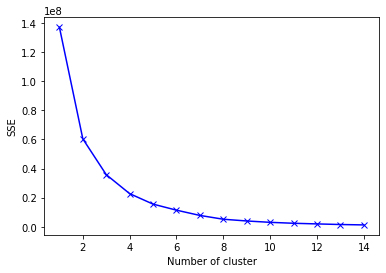

In [ ]:

# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(df6)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
data_copy_labels = df6.copy(deep=True)

In [ ]:
data_copy_labels.head(20)

,min5_average_pdcp_sdu_delay_dl,Labels
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
5,0.000000,0
6,0.000000,0
7,0.000000,0
8,39.107143,0
9,12.000000,0


In [ ]:
n = 2

kmeans = KMeans(n_clusters = n, max_iter = 2000, random_state=1) #Apply the K-Means algorithm
kmeans.fit(df6) #Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 

labels = kmeans.predict(df6)
data_copy_labels['Labels'] = labels #Save the predictions on the scaled data from K-Means

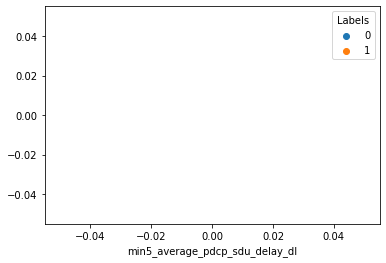

In [ ]:
sns.scatterplot(x = 'min5_average_pdcp_sdu_delay_dl' , data = data_copy_labels, hue='Labels')

In [ ]:
#df6_zero_removal = df6[ df6['min5_average_pdcp_sdu_delay_dl'] == 0 ].index
# Delete these row indexes from dataFrame
#df6.drop(df6_zero_removal , inplace=True)

# Misc

In [ ]:
data['day']=pd.to_datetime(data['day'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    90936 non-null  int64         
 1   starttime                             90936 non-null  object        
 2   day                                   90936 non-null  datetime64[ns]
 3   ecgi                                  90936 non-null  int64         
 4   cuid                                  90936 non-null  int64         
 5   plr_cuid                              90936 non-null  int64         
 6   duid                                  90936 non-null  int64         
 7   plr_cellid                            90936 non-null  int64         
 8   min5_average_pdcp_sdu_delay_dl        90936 non-null  float64       
 9   min5_average_pdcp_sdu_drop_rate_dl    90936 non-null  float64       
 10

In [ ]:
data['day'].dt.month

0        11
1        11
2        11
3        10
4        10
         ..
90931    10
90932    10
90933    10
90934    10
90935    10
Name: day, Length: 90936, dtype: int64

In [ ]:
data['month']=data['day'].dt.month

In [ ]:
data['year']=data['day'].dt.year

In [ ]:
data['day']=data['day'].dt.day

In [ ]:
data.head()

,id,starttime,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate,month,year
0,650154,2021-11-01 01:10:00,1,2708756710728705,3,0,0,3,0.0,0.0,0.0,0.0,0,0,11,2021
1,650172,2021-11-01 01:10:00,1,2708756710728450,0,2,2,0,0.0,0.0,0.0,0.0,0,0,11,2021
2,650157,2021-11-01 01:10:00,1,2708756710728450,2,2,0,0,0.0,0.0,0.0,0.0,0,0,11,2021
3,637337,2021-10-28 07:20:00,28,2708756710728193,0,1,1,0,0.0,0.0,0.0,0.0,0,0,10,2021
4,637314,2021-10-28 07:20:00,28,2708756710728193,1,1,0,0,0.0,0.0,0.0,0.0,0,0,10,2021


In [ ]:
x=data.drop(['id','starttime'],axis=1)

In [ ]:
x.head()

,day,ecgi,cuid,plr_cuid,duid,plr_cellid,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate,month,year
0,1,2708756710728705,3,0,0,3,0.0,0.0,0.0,0.0,0,0,11,2021
1,1,2708756710728450,0,2,2,0,0.0,0.0,0.0,0.0,0,0,11,2021
2,1,2708756710728450,2,2,0,0,0.0,0.0,0.0,0.0,0,0,11,2021
3,28,2708756710728193,0,1,1,0,0.0,0.0,0.0,0.0,0,0,10,2021
4,28,2708756710728193,1,1,0,0,0.0,0.0,0.0,0.0,0,0,10,2021


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   day                                   90936 non-null  int64  
 1   ecgi                                  90936 non-null  int64  
 2   cuid                                  90936 non-null  int64  
 3   plr_cuid                              90936 non-null  int64  
 4   duid                                  90936 non-null  int64  
 5   plr_cellid                            90936 non-null  int64  
 6   min5_average_pdcp_sdu_delay_dl        90936 non-null  float64
 7   min5_average_pdcp_sdu_drop_rate_dl    90936 non-null  float64
 8   min5_pdcp_packets_lost_rate_dl        90936 non-null  float64
 9   min5_pdcp_packets_lost_rate_ul        90936 non-null  float64
 10  min5_volte_downlink_packet_loss_rate  90936 non-null  int64  
 11  min5_volte_upli

In [ ]:
x['ecgi'].astype('category')

0        2708756710728705
1        2708756710728450
2        2708756710728450
3        2708756710728193
4        2708756710728193
               ...       
90931    2708756710728707
90932    2708756710728707
90933    2708756710728707
90934    2708756710728707
90935    2708756710728707
Name: ecgi, Length: 90936, dtype: category
Categories (9, int64): [2708756710728193, 2708756710728194, 2708756710728195, 2708756710728449, ...,
                        2708756710728451, 2708756710728705, 2708756710728706, 2708756710728707]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   day                                   90936 non-null  int64  
 1   ecgi                                  90936 non-null  int64  
 2   cuid                                  90936 non-null  int64  
 3   plr_cuid                              90936 non-null  int64  
 4   duid                                  90936 non-null  int64  
 5   plr_cellid                            90936 non-null  int64  
 6   min5_average_pdcp_sdu_delay_dl        90936 non-null  float64
 7   min5_average_pdcp_sdu_drop_rate_dl    90936 non-null  float64
 8   min5_pdcp_packets_lost_rate_dl        90936 non-null  float64
 9   min5_pdcp_packets_lost_rate_ul        90936 non-null  float64
 10  min5_volte_downlink_packet_loss_rate  90936 non-null  int64  
 11  min5_volte_upli

In [ ]:
x['ecgi']=x['ecgi'].astype('category')

In [ ]:
x['cuid']=x['cuid'].astype('category')

In [ ]:
x['duid']=x['duid'].astype('category')

In [ ]:
x['plr_cuid']=x['plr_cuid'].astype('category')

In [ ]:
x['plr_cellid']=x['plr_cellid'].astype('category')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   day                                   90936 non-null  int64   
 1   ecgi                                  90936 non-null  category
 2   cuid                                  90936 non-null  category
 3   plr_cuid                              90936 non-null  category
 4   duid                                  90936 non-null  category
 5   plr_cellid                            90936 non-null  category
 6   min5_average_pdcp_sdu_delay_dl        90936 non-null  float64 
 7   min5_average_pdcp_sdu_drop_rate_dl    90936 non-null  float64 
 8   min5_pdcp_packets_lost_rate_dl        90936 non-null  float64 
 9   min5_pdcp_packets_lost_rate_ul        90936 non-null  float64 
 10  min5_volte_downlink_packet_loss_rate  90936 non-null  int64   
 11  mi

In [ ]:
x.isnull().sum()

day                                     0
ecgi                                    0
cuid                                    0
plr_cuid                                0
duid                                    0
plr_cellid                              0
min5_average_pdcp_sdu_delay_dl          0
min5_average_pdcp_sdu_drop_rate_dl      0
min5_pdcp_packets_lost_rate_dl          0
min5_pdcp_packets_lost_rate_ul          0
min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
month                                   0
year                                    0
dtype: int64

In [ ]:
pd.get_dummies(x)

,day,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate,month,year,ecgi_2708756710728193,...,plr_cuid_2,plr_cuid_3,duid_0,duid_1,duid_2,duid_3,plr_cellid_0,plr_cellid_1,plr_cellid_2,plr_cellid_3
0,1,0.000000,0.0,0.000000,0.0,0,0,11,2021,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.000000,0.0,0.000000,0.0,0,0,11,2021,0,...,1,0,0,0,1,0,1,0,0,0
2,1,0.000000,0.0,0.000000,0.0,0,0,11,2021,0,...,1,0,1,0,0,0,1,0,0,0
3,28,0.000000,0.0,0.000000,0.0,0,0,10,2021,1,...,0,0,0,1,0,0,1,0,0,0
4,28,0.000000,0.0,0.000000,0.0,0,0,10,2021,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,18,0.000000,0.0,0.000000,0.0,0,0,10,2021,0,...,0,0,0,0,0,1,0,0,0,1
90932,18,0.000000,0.0,0.107359,0.0,0,0,10,2021,0,...,0,1,0,0,0,1,1,0,0,0
90933,18,32.834236,0.0,0.107359,0.0,0,0,10,2021,0,...,0,1,1,0,0,0,1,0,0,0
90934,18,0.000000,0.0,0.000000,0.0,0,0,10,2021,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.isnull().sum()

day                                     0
min5_average_pdcp_sdu_delay_dl          0
min5_average_pdcp_sdu_drop_rate_dl      0
min5_pdcp_packets_lost_rate_dl          0
min5_pdcp_packets_lost_rate_ul          0
min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
month                                   0
year                                    0
ecgi_2708756710728193                   0
ecgi_2708756710728194                   0
ecgi_2708756710728195                   0
ecgi_2708756710728449                   0
ecgi_2708756710728450                   0
ecgi_2708756710728451                   0
ecgi_2708756710728705                   0
ecgi_2708756710728706                   0
ecgi_2708756710728707                   0
cuid_0                                  0
cuid_1                                  0
cuid_2                                  0
cuid_3                                  0
plr_cuid_0                              0
plr_cuid_1                        

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()


In [ ]:
data_scaled=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
data_scaled

,day,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate,month,year,ecgi_2708756710728193,...,plr_cuid_2,plr_cuid_3,duid_0,duid_1,duid_2,duid_3,plr_cellid_0,plr_cellid_1,plr_cellid_2,plr_cellid_3
0,-4.523103,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,7.304454,0.0,-0.301012,...,-0.449796,-0.527256,0.890550,-0.386750,-0.405718,-0.453925,-1.038412,-0.387407,-0.418953,1.991599
1,-4.523103,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,7.304454,0.0,-0.301012,...,2.223230,-0.527256,-1.122902,-0.386750,2.464768,-0.453925,0.963009,-0.387407,-0.418953,-0.502109
2,-4.523103,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,7.304454,0.0,-0.301012,...,2.223230,-0.527256,0.890550,-0.386750,-0.405718,-0.453925,0.963009,-0.387407,-0.418953,-0.502109
3,0.912811,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,-0.136903,0.0,3.322128,...,-0.449796,-0.527256,-1.122902,2.585652,-0.405718,-0.453925,0.963009,-0.387407,-0.418953,-0.502109
4,0.912811,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,-0.136903,0.0,3.322128,...,-0.449796,-0.527256,0.890550,-0.386750,-0.405718,-0.453925,0.963009,-0.387407,-0.418953,-0.502109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,-1.100490,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,-0.136903,0.0,-0.301012,...,-0.449796,-0.527256,-1.122902,-0.386750,-0.405718,2.203008,-1.038412,-0.387407,-0.418953,1.991599
90932,-1.100490,-0.238252,-0.014825,5.301418,-0.164262,0.0,0.0,-0.136903,0.0,-0.301012,...,-0.449796,1.896612,-1.122902,-0.386750,-0.405718,2.203008,0.963009,-0.387407,-0.418953,-0.502109
90933,-1.100490,0.606891,-0.014825,5.301418,-0.164262,0.0,0.0,-0.136903,0.0,-0.301012,...,-0.449796,1.896612,0.890550,-0.386750,-0.405718,-0.453925,0.963009,-0.387407,-0.418953,-0.502109
90934,-1.100490,-0.238252,-0.014825,-0.157851,-0.164262,0.0,0.0,-0.136903,0.0,-0.301012,...,-0.449796,-0.527256,-1.122902,-0.386750,-0.405718,2.203008,-1.038412,-0.387407,-0.418953,1.991599


In [ ]:
#importing PCA and TSNE


In [ ]:
#from sklearn.manifold import TSNE

In [ ]:
#the t#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(random_state=1,n_components=2) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

In [ ]:
#from sklearn.cluster import KMeans

In [ ]:
"""
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
"""


In [ ]:
"""
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)
"""

In [ ]:
"""
n = 3

kmeans = KMeans(n_clusters = n, max_iter = 1000, random_state=1) #Apply the K-Means algorithm
kmeans.fit(data_scaled) #Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 

labels = kmeans.predict(data_scaled)
data_scaled_copy['Labels'] = labels #Save the predictions on the scaled data from K-Means
data['Labels'] = labels #Save the predictions on the scaled data from K-Means
"""

In [ ]:
#data_scaled_copy.head()

In [ ]:
#data_pca1['label']=labels

In [ ]:
#import seaborn as sns

In [ ]:
#sns.scatterplot(data_pca1[0],data_pca1[1],hue='label',data=data_pca1)

In [ ]:
#data.info()

In [ ]:
#data.to_csv('kmeansclustering.csv',index=False)

In [ ]:
#data_scaled

In [ ]:
#data_scaled.columns

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state = 1)  #Apply the TSNE algorithm with random state = 1
#data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=df.ecgi)


In [ ]:
#from sklearn.mixture import GaussianMixture

In [ ]:
"""n = 3 
gmm = GaussianMixture(n_components = n , random_state=1) #Apply the Gaussian Mixture algorithm
gmm.fit(data_scaled) #Fit the gmm function on the scaled data

gmmlabels = gmm.predict(data_scaled)
data_scaled_copy['GmmLabels'] = gmmlabels
data['GmmLabels'] = gmmlabels"""

In [ ]:
#sns.scatterplot(data_pca1[0],data_pca1[1],hue='label',data=data_pca1)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import seaborn as sns

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(data_pca1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


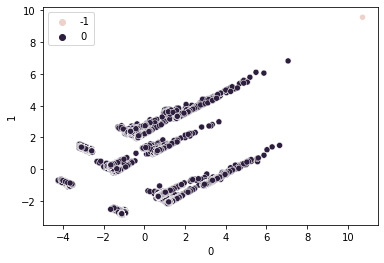

In [ ]:
sns.scatterplot(data_pca1[0],data_pca1[1],hue=clustering.labels_)

In [ ]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(support_fraction=1., contamination=0.261)
clf.fit_predict(data_pca1['min5_average_pdcp_sdu_delay_dl',	'min5_average_pdcp_sdu_drop_rate_dl',	'min5_pdcp_packets_lost_rate_dl',	'min5_pdcp_packets_lost_rate_ul'])


KeyError: ignored